In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test = pd.read_csv('titanic_test.csv')

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test['Pclass']

0      3
1      3
2      2
3      3
4      3
5      3
6      3
7      2
8      3
9      3
10     3
11     1
12     1
13     2
14     1
15     2
16     2
17     3
18     3
19     3
20     1
21     3
22     1
23     1
24     1
25     3
26     1
27     3
28     1
29     3
      ..
388    3
389    3
390    1
391    1
392    3
393    2
394    3
395    1
396    3
397    1
398    3
399    3
400    1
401    2
402    1
403    1
404    1
405    2
406    2
407    1
408    3
409    3
410    3
411    1
412    3
413    3
414    1
415    3
416    3
417    3
Name: Pclass, Length: 418, dtype: int64

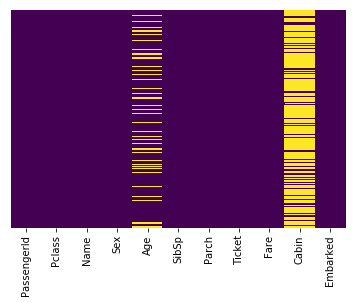

In [8]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
test['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
5      14.0
6      30.0
7      26.0
8      18.0
9      21.0
10      NaN
11     46.0
12     23.0
13     63.0
14     47.0
15     24.0
16     35.0
17     21.0
18     27.0
19     45.0
20     55.0
21      9.0
22      NaN
23     21.0
24     48.0
25     50.0
26     22.0
27     22.5
28     41.0
29      NaN
       ... 
388    21.0
389     6.0
390    23.0
391    51.0
392    13.0
393    47.0
394    29.0
395    18.0
396    24.0
397    48.0
398    22.0
399    31.0
400    30.0
401    38.0
402    22.0
403    17.0
404    43.0
405    20.0
406    23.0
407    50.0
408     NaN
409     3.0
410     NaN
411    37.0
412    28.0
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
train = pd.read_csv('titanic_train.csv')

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


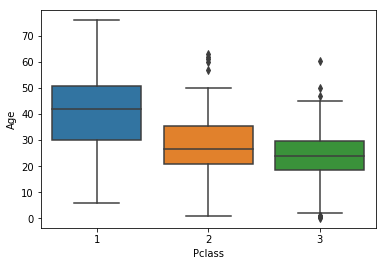

In [13]:
sns.boxplot(x='Pclass',y='Age',data=test)

In [17]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 26
        else:
            return 24
    else:
        return Age

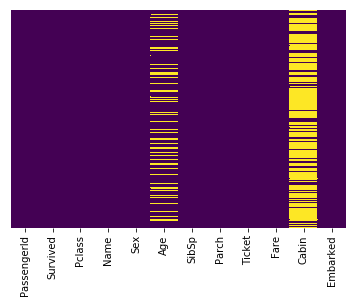

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

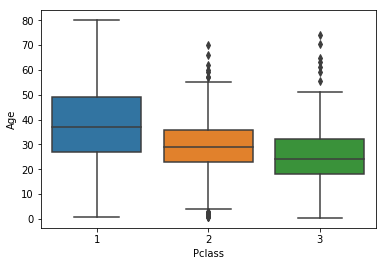

In [16]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [18]:
test['Age'] = test[['Age','Pclass']].apply(fill_age,axis=1)

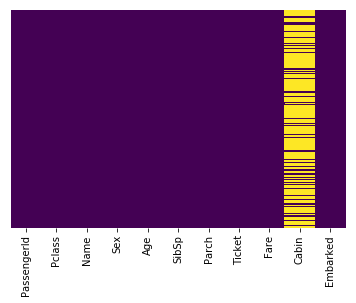

In [19]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
def compute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 39
        elif Pclass == 2:
            return 27
        else:
            return 24
    else:
        return Age

In [21]:
train['Age'] = train[['Age','Pclass']].apply(compute_age,axis=1)

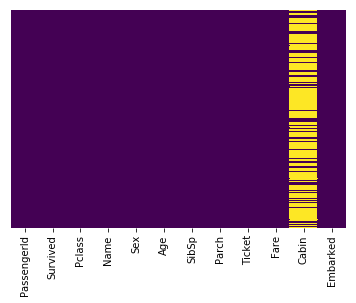

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
sex = pd.get_dummies(test['Sex'],drop_first=True)

In [24]:
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [25]:
test = pd.concat([test,sex,embark],axis=1)

In [26]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1


In [27]:
test.drop(['Sex','Name','Ticket','Fare','Embarked'],axis=1,inplace=True)

In [28]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Cabin,male,Q,S
0,892,3,34.5,0,0,NaN,1,1,0
1,893,3,47.0,1,0,NaN,0,0,1
2,894,2,62.0,0,0,NaN,1,1,0
3,895,3,27.0,0,0,NaN,1,0,1
4,896,3,22.0,1,1,NaN,0,0,1


In [32]:
test.dropna(inplace=True)

In [33]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Cabin,male,Q,S
12,904,1,23.0,1,0,B45,0,0,1
14,906,1,47.0,1,0,E31,0,0,1
24,916,1,48.0,1,3,B57 B59 B63 B66,0,0,0
26,918,1,22.0,0,1,B36,0,0,0
28,920,1,41.0,0,0,A21,1,0,1


In [34]:
test.drop('Cabin',axis=1,inplace=True)

In [35]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,male,Q,S
12,904,1,23.0,1,0,0,0,1
14,906,1,47.0,1,0,0,0,1
24,916,1,48.0,1,3,0,0,0
26,918,1,22.0,0,1,0,0,0
28,920,1,41.0,0,0,1,0,1


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 12 to 414
Data columns (total 8 columns):
PassengerId    91 non-null int64
Pclass         91 non-null int64
Age            91 non-null float64
SibSp          91 non-null int64
Parch          91 non-null int64
male           91 non-null uint8
Q              91 non-null uint8
S              91 non-null uint8
dtypes: float64(1), int64(4), uint8(3)
memory usage: 4.5 KB


In [38]:
new_sex = pd.get_dummies(train['Sex'],drop_first=True)
new_embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [39]:
train = pd.concat([train,new_sex,new_embark],axis=1)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 15 columns):
PassengerId    202 non-null int64
Survived       202 non-null int64
Pclass         202 non-null int64
Name           202 non-null object
Sex            202 non-null object
Age            202 non-null float64
SibSp          202 non-null int64
Parch          202 non-null int64
Ticket         202 non-null object
Fare           202 non-null float64
Cabin          202 non-null object
Embarked       202 non-null object
male           202 non-null uint8
Q              202 non-null uint8
S              202 non-null uint8
dtypes: float64(2), int64(5), object(5), uint8(3)
memory usage: 21.1+ KB


In [43]:
train.drop(['Sex','Name','Ticket','Embarked','PassengerId'],axis=1,inplace=True)

In [44]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,1,1,38.0,1,0,71.2833,C85,0,0,0
3,1,1,35.0,1,0,53.1000,C123,0,0,1
6,0,1,54.0,0,0,51.8625,E46,1,0,1
10,1,3,4.0,1,1,16.7000,G6,0,0,1
11,1,1,58.0,0,0,26.5500,C103,0,0,1


In [46]:
test.drop('PassengerId',axis=1,inplace=True)

In [47]:
test.head()

,Pclass,Age,SibSp,Parch,male,Q,S
12,1,23.0,1,0,0,0,1
14,1,47.0,1,0,0,0,1
24,1,48.0,1,3,0,0,0
26,1,22.0,0,1,0,0,0
28,1,41.0,0,0,1,0,1


In [74]:
train.drop(['Fare'],axis=1,inplace=True)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
model = LogisticRegression()

In [77]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [78]:
from sklearn.cross_validation import train_test_split

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [80]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
1,1,1,38.0,1,0,0,0,0
3,1,1,35.0,1,0,0,0,1
6,0,1,54.0,0,0,1,0,1
10,1,3,4.0,1,1,0,0,1
11,1,1,58.0,0,0,0,0,1


In [81]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
prediction = model.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
print(confusion_matrix(y_test,prediction))

[[11  9]
 [ 8 33]]


In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.58      0.55      0.56        20
          1       0.79      0.80      0.80        41

avg / total       0.72      0.72      0.72        61



In [87]:
new_predictions = model.predict(test)

In [88]:
new_predictions

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1], dtype=int64)

In [92]:
prediction_col = pd.DataFrame(data=test,index=new_predictions,columns=['Survived'])